In [58]:
!pip install nltk seaborn keras

You should consider upgrading via the 'C:\Users\jamilur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [59]:


import tensorflow as tf
from tensorflow import keras

import re
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



In [60]:

import pandas as pd
df = pd.read_csv('translation-dataset/generated_reviews_crowd.csv',)

df.head(5)



,en_text,th_text
0,Doesn't snap together well.,เข้ากันไม่ค่อยดี
1,Charged it after every use as directed for abo...,เรียกเก็บเงินหลังจากใช้งานทุกครั้งตามที่กำกับไ...
2,"My son wanted this movie so badly, that he sai...",ลูกชายของฉันต้องการภาพยนตร์เรื่องนี้เพื่อไม่ดี...
3,But his writing has degenerated in later books.,แต่หนังสือเล่มที่ผ่านมาของเขามันดูด้อยคุณภาพลง
4,"It was supposed to be a good bag, well you get...",มันควรที่จะเป็นกระเป๋าที่ดี เอ้อ เธอได้ในสิ่งท...


In [61]:


print("Unique values before dropping duplicates")
print(df.en_text.nunique())
print(df.th_text.nunique())

df.drop_duplicates(subset=['en_text'],inplace=True)
df.drop_duplicates(subset=['th_text'],inplace=True)

print("\n\nUnique values before dropping duplicates")
print(df.th_text.nunique())
print(df.th_text.nunique())



Unique values before dropping duplicates
24587
24585


Unique values before dropping duplicates
24585
24585


In [62]:
print(df.isnull().any(),'\n')
print(df.isnull().sum())

en_text    False
th_text    False
dtype: bool 

en_text    0
th_text    0
dtype: int64


In [63]:
import nltk
nltk.download('stopwords')
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
eng_stopwords = set(stopwords.words("english"))

#language => either 'english' or 'french'
def preprocess(sentence,language):
    sentence = sentence.lower()
    if language == "english":
        sentence = ' '.join([contractions[word] if word in contractions else word for word in sentence.split()])
#         sentence = ' '.join([word for word in sentence.split() if word not in eng_stopwords])
    sentence = re.sub(r"[.'!#$%&\'()*+,-./:;<=>?@[\\]^ `{|}~]"," ",sentence)
    sentence = ' '.join([word for word in sentence.split()])
    
    return sentence
    



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jamilur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:


df.th_text = df.th_text.apply(lambda x:preprocess(x,'th_text'))
df.en_text = df.en_text.apply(lambda x:preprocess(x,'en_text'))

print(df.shape,'\n')
df.info()



(24585, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24585 entries, 0 to 24586
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   en_text  24585 non-null  object
 1   th_text  24585 non-null  object
dtypes: object(2)
memory usage: 576.2+ KB


In [65]:
import numpy as np



df["en_input"] = df.en_text.apply(lambda x:'sostoken ' + x)
df["en_label"] = df.en_text.apply(lambda x:x + ' eostoken')

encoder_input = np.array(df.th_text)
decoder_input = np.array(df.en_input)
decoder_label = np.array(df.en_label)


indices = np.arange(24585)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

df.head()




,en_text,th_text,en_input,en_label
0,doesn't snap together well.,เข้ากันไม่ค่อยดี,sostoken doesn't snap together well.,doesn't snap together well. eostoken
1,charged it after every use as directed for abo...,เรียกเก็บเงินหลังจากใช้งานทุกครั้งตามที่กำกับไ...,sostoken charged it after every use as directe...,charged it after every use as directed for abo...
2,"my son wanted this movie so badly, that he sai...",ลูกชายของฉันต้องการภาพยนตร์เรื่องนี้เพื่อไม่ดี...,"sostoken my son wanted this movie so badly, th...","my son wanted this movie so badly, that he sai..."
3,but his writing has degenerated in later books.,แต่หนังสือเล่มที่ผ่านมาของเขามันดูด้อยคุณภาพลง,sostoken but his writing has degenerated in la...,but his writing has degenerated in later books...
4,"it was supposed to be a good bag, well you get...",มันควรที่จะเป็นกระเป๋าที่ดี เอ้อ เธอได้ในสิ่งท...,"sostoken it was supposed to be a good bag, wel...","it was supposed to be a good bag, well you get..."


In [66]:


total = df.shape[0]
test_size = 0.3

train_encoder_input = encoder_input[:-int(total*test_size)]
train_decoder_input = decoder_input[:-int(total*test_size)]
train_decoder_label = decoder_label[:-int(total*test_size)]

test_encoder_input = encoder_input[-int(total*test_size):]
test_decoder_input = decoder_input[-int(total*test_size):]
test_decoder_label = decoder_label[-int(total*test_size):]

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)



train dataset shape
(17210,)
(17210,)
(17210,)


test dataset shape
(7375,)
(7375,)
(7375,)


In [67]:


thai_tok = Tokenizer()
thai_tok.fit_on_texts(train_encoder_input)
print(f"Number of unique words used in english sentences >> {len(thai_tok.index_word)}")

en_tok = Tokenizer()
en_tok.fit_on_texts(train_decoder_input)
en_tok.fit_on_texts(train_decoder_label)
print(f"Number of unique words used in french sentences >> {len(en_tok.index_word)}")



Number of unique words used in english sentences >> 32226
Number of unique words used in french sentences >> 10201


In [68]:



total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in en_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"english","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")





========================= english =========================
4475 of 10201 words are used less than 3times,
which is only 44.0% of total words used
But they occupy 2.0% of total frequency 


In [69]:


total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in thai_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"TH","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")



========================= TH =========================
31746 of 32226 words are used less than 3times,
which is only 99.0% of total words used
But they occupy 84.0% of total frequency 


In [70]:


thai_word_size = 6000
thai_vocab_size = thai_word_size+1
en_word_size = 12000
en_vocab_size = en_word_size+1

thai_tok = Tokenizer(num_words=thai_word_size)
thai_tok.fit_on_texts(train_encoder_input)

train_encoder_input = thai_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = thai_tok.texts_to_sequences(test_encoder_input)

en_tok = Tokenizer(num_words=en_word_size)
en_tok.fit_on_texts(train_decoder_input)
en_tok.fit_on_texts(train_decoder_label)

train_decoder_input = en_tok.texts_to_sequences(train_decoder_input)
train_decoder_label = en_tok.texts_to_sequences(train_decoder_label)

test_decoder_input = en_tok.texts_to_sequences(test_decoder_input)
test_decoder_label = en_tok.texts_to_sequences(test_decoder_label)



thai
mean >>  0.7147007553747821
eng
mean >>  16.5


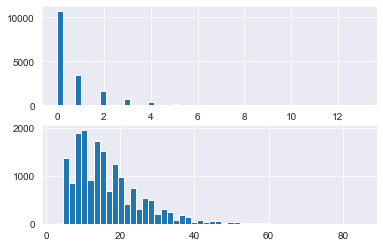

In [71]:
print("thai")
thai_len = [len(seq) for seq in train_encoder_input]
print("mean >> ",np.mean(thai_len))
plt.subplot(2,1,1)
plt.hist(thai_len,bins=50)


print("eng")
en_lens = [len(seq) for seq in train_decoder_input]
print("mean >> ",np.mean(en_lens))
plt.subplot(2,1,2)
plt.hist(en_lens,bins=50)
plt.show()

In [72]:


thai_sequence_size = 10
en_sequence_size = 20

train_encoder_input = pad_sequences(train_encoder_input,padding='post',truncating='post',maxlen=thai_sequence_size)
test_encoder_input = pad_sequences(test_encoder_input,padding='post',truncating='post',maxlen=thai_sequence_size)

train_decoder_input = pad_sequences(train_decoder_input,padding='post',truncating='post',maxlen=en_sequence_size)
train_decoder_label = pad_sequences(train_decoder_label,padding='post',truncating='post',maxlen=en_sequence_size)

test_decoder_input = pad_sequences(test_decoder_input,padding='post',truncating='post',maxlen=en_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label,padding='post',truncating='post',maxlen=en_sequence_size)

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)



train dataset shape
(17210, 10)
(17210, 20)
(17210, 20)


test dataset shape
(7375, 10)
(7375, 20)
(7375, 20)


In [73]:
from keras.layers import Input,Embedding,LSTM,Dense,Concatenate,Attention
from keras.models import Model
from keras.utils import plot_model
from keras import backend as K

#hyperparameters
embedding_size = 256
hidden_size = 256

# trainer model (generator model will use the same encoder tho)
encoder_input = Input(shape=[thai_sequence_size])
encoder_embedding = Embedding(thai_vocab_size,embedding_size,mask_zero=True)
encoder_embedded = encoder_embedding(encoder_input)

encoder_lstm1 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1,encoder_h1,encoder_c1 = encoder_lstm1(encoder_embedded)

encoder_lstm2 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2,encoder_h2,encoder_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output3,encoder_h3,encoder_c3 = encoder_lstm3(encoder_output1)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(en_vocab_size,embedding_size,mask_zero=True)
decoder_embedded = decoder_embedding(decoder_input)

decoder_lstm = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_output,_,_ = decoder_lstm(decoder_embedded,initial_state=[encoder_h3,encoder_c3])

attn_layer = Attention()
attn_context = attn_layer([decoder_output,encoder_output3])

decoder_output = Concatenate(axis=-1)([decoder_output,attn_context])
tanh_dense= Dense(hidden_size*2,activation=K.tanh)
decoder_output = tanh_dense(decoder_output)

softmax_dense = Dense(en_vocab_size,activation='softmax')
decoder_output = softmax_dense(decoder_output)

trainer_model = Model([encoder_input,decoder_input],decoder_output)
trainer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
plot_model(trainer_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [75]:
epochs = 10
trainer_hist =trainer_model.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
108/108 [==============================] - 154s 1s/step - loss: 4.9007 - accuracy: 0.0530 - val_loss: 4.5500 - val_accuracy: 0.0616
Epoch 2/10
108/108 [==============================] - 146s 1s/step - loss: 4.4570 - accuracy: 0.0682 - val_loss: 4.4033 - val_accuracy: 0.0727
Epoch 3/10
108/108 [==============================] - 146s 1s/step - loss: 4.2560 - accuracy: 0.0802 - val_loss: 4.1547 - val_accuracy: 0.0885
Epoch 4/10
108/108 [==============================] - 147s 1s/step - loss: 3.9699 - accuracy: 0.1038 - val_loss: 3.9651 - val_accuracy: 0.1064
Epoch 5/10
108/108 [==============================] - 148s 1s/step - loss: 3.7845 - accuracy: 0.1174 - val_loss: 3.8664 - val_accuracy: 0.1172
Epoch 6/10
108/108 [==============================] - 149s 1s/step - loss: 3.6551 - accuracy: 0.1265 - val_loss: 3.8052 - val_accuracy: 0.1249
Epoch 7/10
108/108 [==============================] - 148s 1s/step - loss: 3.5432 - accuracy: 0.1376 - val_loss: 3.7640 - val_accuracy: 0.1309

In [76]:
gen_encoder = Model([encoder_input],[encoder_output3,encoder_h3,encoder_c3])

gen_decoder_values_input = Input(shape=(thai_sequence_size,hidden_size))
gen_decoder_h_input = Input(shape=[hidden_size])
gen_decoder_c_input = Input(shape=[hidden_size])

gen_decoder_embedded = decoder_embedding(decoder_input)
gen_decoder_output,gen_decoder_h,gen_decoder_c = decoder_lstm(gen_decoder_embedded,initial_state=[gen_decoder_h_input,gen_decoder_c_input])

attn_context = attn_layer([gen_decoder_output,gen_decoder_values_input])
gen_decoder_output = Concatenate(axis=-1)([gen_decoder_output,attn_context])

gen_decoder_output = tanh_dense(gen_decoder_output)
gen_decoder_output = softmax_dense(gen_decoder_output)

gen_decoder = Model([decoder_input]+[gen_decoder_values_input,gen_decoder_h_input,gen_decoder_c_input],[gen_decoder_output,gen_decoder_h,gen_decoder_c])

In [77]:


def seq2eng(seq):
    ret =[]
    for n in seq:
        if n != 0:
            ret.append(thai_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

def seq2fr(seq):
    ret =[]
    for n in seq:
        if n != 0 and en_tok.index_word[n] != 'eostoken':
            ret.append(en_tok.index_word[n])
    ret = ' '.join(ret)
    return ret



In [78]:


def generate_from_encoder_input(encoder_input):
    encoder_input = encoder_input.reshape(1,-1)
    values,h,c = gen_encoder.predict(encoder_input)
    
    single_tok = np.zeros((1,1))
    single_tok[0,0] = en_tok.word_index['sostoken']
    decoder_input = single_tok
    
    generated = []
    count = 0
    while(True):
        decoder_output,new_h,new_c = gen_decoder.predict([decoder_input]+[values,h,c])
        count +=1
        
        sampled_index = np.argmax(decoder_output[0,-1,:])
        sampled_word = en_tok.index_word[sampled_index]
        
        if sampled_word != 'eostoken' and sampled_index != 0:
            generated.append(sampled_word)
        if count >= en_sequence_size or sampled_word == 'eostoken':
            break
        
        h,c = new_h,new_c
        decoder_input[0,0] = sampled_index
    
    generated = ' '.join(generated)
    return generated



In [79]:
for i in range(520,525):
    print("\n<<sample encoder input english sentence>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("<<sample generated french sentence>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("<<answer french sentence>>")
    print(seq2fr(train_decoder_label[i]))
    print("========================================\n")


<<sample encoder input english sentence>>
ฉันต้องการเคสกันน้ำสำหรับกล้องเพราะฉันมักจะโดนพายุและ หรือวิ่งเข้าไปในป่าดังนั้นสิ่งเหล่านี้ใช้ได้กับฉันตราบใดที่พวกเขายังคงปิดอยู่


<<sample generated french sentence>>
1/1 [==============================] - 0s 17ms/step
the author has been introduced to be a broad 54 85


<<answer french sentence>>
i wanted water proof cases for the cameras because i'm prone to getting caught in thunderstorms and or running off


<<sample encoder input english sentence>>
หากคุณต้องการดูว่าดาวเหล่านี้กำลังทำอะไรในช่วงเวลานั้นเช่นเดียวกับการได้เห็นรูปลักษณ์ที่สวยงามและอ่อนเยาว์ของพวกเขาคุณอาจจะสนุกไปกับมัน


<<sample generated french sentence>>
1/1 [==============================] - 0s 18ms/step
i have to be a fan of the book and the book was a little bit and the book was


<<answer french sentence>>
if you want to see what all of those stars were doing at that time period as well as seeing


<<sample encoder input english sentence>>
ในขณะที่ฉันรักซอมบี้ที่ดี

In [80]:
idx = [24,302, 20, 1, 55]

print("Results on Train Dataset")
for i in idx:
    print("\nINPUT ENG>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("GENERATED FR>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("ANSWER FR>>")
    print(seq2fr(train_decoder_label[i]))
    print("=====================================================================\n")

Results on Train Dataset

INPUT ENG>>
ลูกสาวของฉันรักมัน มันทำออกมาได้ดีมากๆ


GENERATED FR>>
1/1 [==============================] - 0s 18ms/step
i bought this book to be a great book but it was a great book but it was a great


ANSWER FR>>
my daughter loved it it's very well made


INPUT ENG>>
มีขุยใต้ทั้งสองด้าน ผลิตภัณฑ์นี้ครับ


GENERATED FR>>
1/1 [==============================] - 0s 22ms/step
i bought this book and the first time i have been a little bit and the first time and it


ANSWER FR>>
there was lint under both sides of it this product sucks


INPUT ENG>>
เราต้องกลับไปและลองสิ่งที่ยากขึ้นในวันถัดไป


GENERATED FR>>
1/1 [==============================] - 0s 18ms/step
i bought this product and the first time


ANSWER FR>>
we had to go back and try some more difficult ones the next day


INPUT ENG>>
แม้ราคา 2 ต่อเกมส์ มันก็จะเกินราคา


GENERATED FR>>
1/1 [==============================] - 0s 20ms/step
i bought this product for my ipad 3 months


ANSWER FR>>
even at 2 per gam